In [2]:
import pandas as pd
# Load the EEG dataset from the uploaded CSV file
eeg_csv_path = '/content/eeg_seizure_data.csv'
eeg_data = pd.read_csv(eeg_csv_path)

# Display dataset information and the first few rows
eeg_data.info(), eeg_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Columns: 668 entries, FP1_power_delta to epileptic_
dtypes: float64(667), int64(1)
memory usage: 11.3 MB


(None,
    FP1_power_delta  FP1_power_theta  FP1_power_alpha  FP1_power_beta  \
 0        15.980332         8.633358         3.092433        0.846559   
 1       223.267803        41.573241        13.043525        6.463381   
 2       158.673907        31.788608         9.956198        3.736977   
 3        29.767326         3.875543         1.553127        0.438266   
 4        33.821075         3.635210         1.347280        0.313205   
 
    FP1_power_gamma  FP2_power_delta  FP2_power_theta  FP2_power_alpha  \
 0         0.372832        17.581626         9.937238         3.485713   
 1         6.168712       298.274432        50.013025        14.411482   
 2         2.926979       232.762741        39.332981        10.956081   
 3         0.140495        45.206547         5.173542         2.028637   
 4         0.080396        55.670043         4.925017         1.783729   
 
    FP2_power_beta  FP2_power_gamma  ...  T5_STD_D4  T5_STD_D5  T5_STD_D6  \
 0        0.945396         0.4

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the EEG dataset
eeg_csv_path = '/content/eeg_seizure_data.csv'  # Replace with the correct path to your dataset
eeg_data = pd.read_csv(eeg_csv_path)

# Separate features and target
X = eeg_data.drop(columns=["epileptic_"])
y = eeg_data["epileptic_"]

# Check for missing values
if X.isnull().sum().sum() > 0:
    print("Warning: Dataset contains missing values!")

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       240
           1       0.86      0.88      0.87       204

    accuracy                           0.88       444
   macro avg       0.88      0.88      0.88       444
weighted avg       0.88      0.88      0.88       444


Confusion Matrix:
[[211  29]
 [ 25 179]]


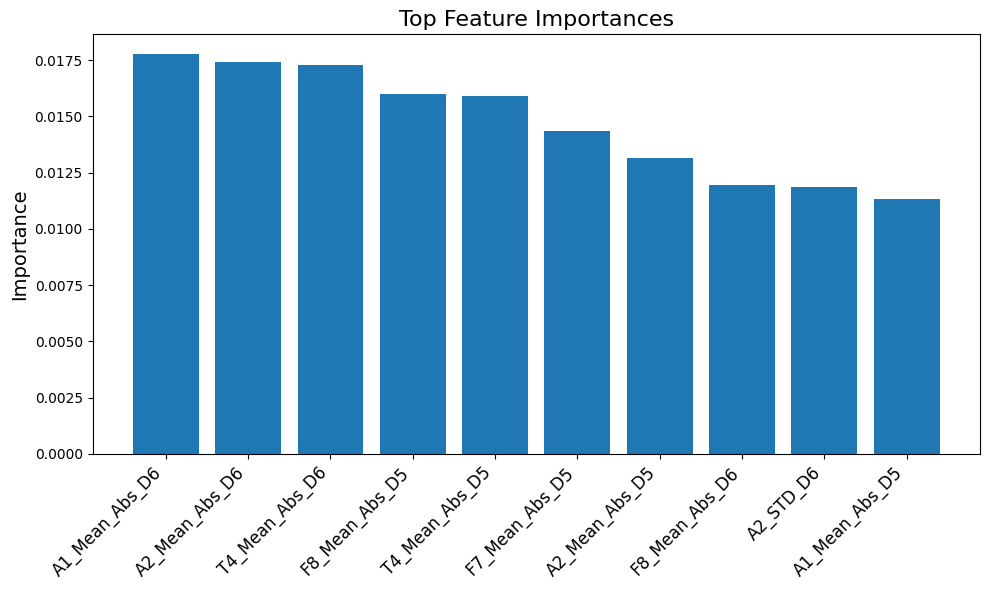

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the top features
plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances", fontsize=16)
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), X.columns[indices[:10]], rotation=45, ha='right', fontsize=12)
plt.ylabel("Importance", fontsize=14)
plt.tight_layout()
plt.show()


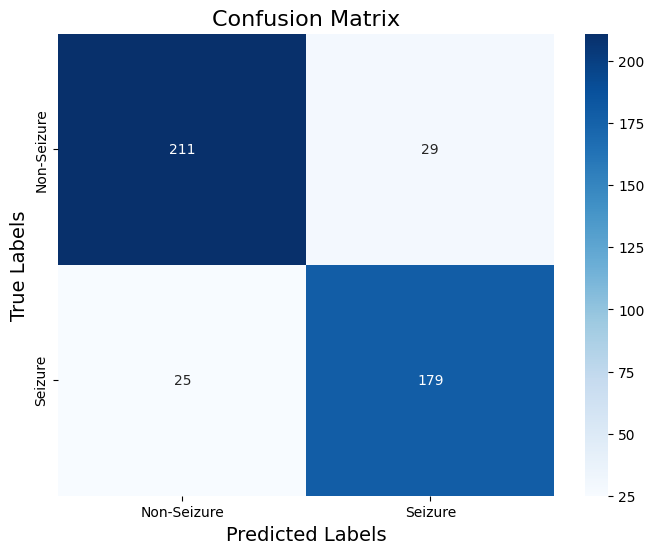

In [5]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Seizure", "Seizure"],
            yticklabels=["Non-Seizure", "Seizure"])
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.show()


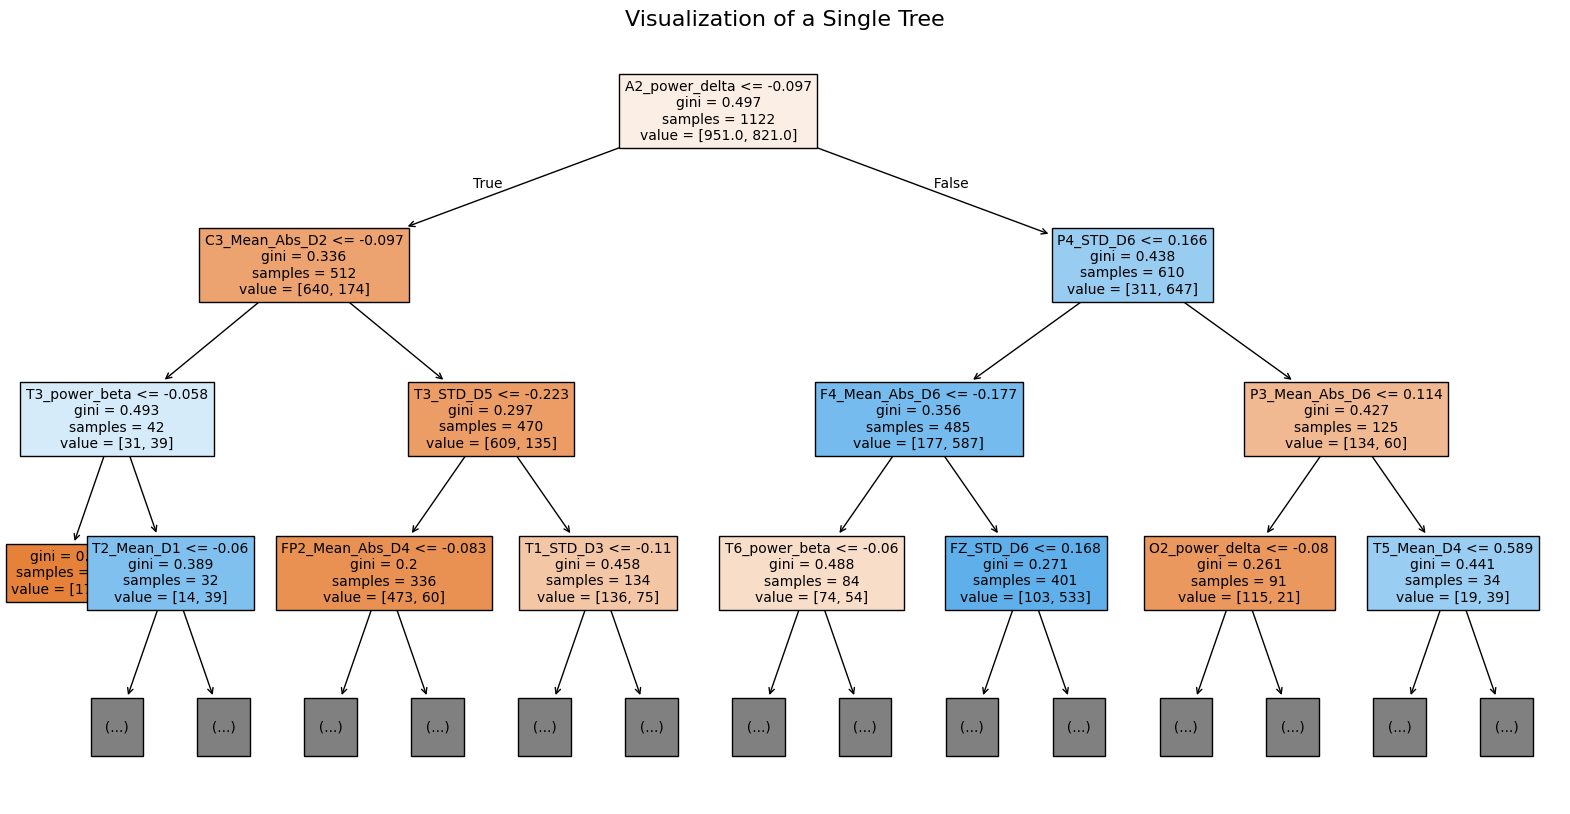

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True, max_depth=3, fontsize=10)
plt.title("Visualization of a Single Tree", fontsize=16)
plt.show()


In [6]:
import joblib

# Save the trained Random Forest model
model_filename = "rf_model"
joblib.dump(rf_model, model_filename)
print(f"Model saved as {model_filename}")

# Save the scaler used for preprocessing
scaler_filename = "scaler"
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved as {scaler_filename}")


Model saved as rf_model
Scaler saved as scaler


In [7]:
pip install dash plotly pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [8]:
pip install joblib dash plotly numpy pandas


In [11]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from collections import deque
import joblib

# Load your Random Forest model
rf_model = joblib.load("rf_model")  # Ensure the correct path
scaler = joblib.load("scaler")     # Ensure the correct path

# Simulate EEG Data (Replace this with real-time EEG signal fetching)
def get_eeg_data():
    # Generate random data of the same feature size as the training data
    num_features = scaler.mean_.shape[0]  # Get the number of features from the scaler
    return np.random.uniform(-100, 100, size=(1, num_features))

# Predict seizure risk level using the trained model
def predict_seizure_risk(eeg_data):
    scaled_data = scaler.transform(eeg_data)  # Scale the input
    prediction = rf_model.predict(scaled_data)  # Predict using the trained model
    risk_levels = {0: "Low", 1: "High"}  # Adjust according to your dataset's labels
    return risk_levels.get(prediction[0], "Unknown")

# Dashboard Buffers
time_window = 100  # Rolling window size
num_channels = 5  # Number of channels to visualize
time_series = deque(maxlen=time_window)
channel_data = [deque(maxlen=time_window) for _ in range(num_channels)]
risk_levels = deque(maxlen=time_window)

# Initialize with dummy data
for i in range(time_window):
    time_series.append(i)
    for ch in range(num_channels):
        channel_data[ch].append(0)  # Default to zero
    risk_levels.append("Low")

# Create Dash app
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Real-Time EEG Seizure Prediction", style={'text-align': 'center'}),

    # EEG Signal Graph
    dcc.Graph(id="eeg-graph", style={'height': '60vh'}),

    # Risk Level Indicator
    html.Div([
        html.H3("Seizure Risk Level:", style={'text-align': 'center'}),
        html.Div(id="risk-level", style={
            'text-align': 'center',
            'font-size': '30px',
            'padding': '20px',
            'color': 'white',
            'background-color': 'green',
            'border-radius': '10px',
            'width': '50%',
            'margin': '0 auto'
        }),
    ]),

    # Interval for real-time updates
    dcc.Interval(id="update-interval", interval=1000, n_intervals=0)  # Update every second
])

# Callback for updating the dashboard
@app.callback(
    [Output("eeg-graph", "figure"), Output("risk-level", "children"), Output("risk-level", "style")],
    [Input("update-interval", "n_intervals")]
)
def update_dashboard(n):
    eeg_data = get_eeg_data()  # Fetch new EEG data
    risk_level = predict_seizure_risk(eeg_data)  # Predict seizure risk

    # Append new data
    time_series.append(time_series[-1] + 1)
    for ch in range(num_channels):
        channel_data[ch].append(eeg_data[0, ch])  # Visualize the first `num_channels` features
    risk_levels.append(risk_level)

    # Color map for risk levels
    risk_colors = {"Low": "green", "High": "red"}

    # Create EEG plot with multiple channels
    eeg_figure = {
        "data": [
            go.Scatter(x=list(time_series), y=list(channel_data[ch]), mode='lines', name=f"Channel {ch+1}")
            for ch in range(num_channels)
        ],
        "layout": go.Layout(
            title="EEG Signals",
            xaxis={"title": "Time"},
            yaxis={"title": "Amplitude (µV)"},
            showlegend=True
        )
    }

    # Update risk level style
    risk_style = {
        'text-align': 'center',
        'font-size': '30px',
        'padding': '20px',
        'color': 'white',
        'background-color': risk_colors.get(risk_level, "gray"),
        'border-radius': '10px',
        'width': '50%',
        'margin': '0 auto'
    }

    return eeg_figure, risk_level, risk_style

if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [10]:
!pip install kaleido


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 79.9/79.9 MB 68.5 MB/s eta 0:00:01

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 79.9/79.9 MB 68.5 MB/s eta 0:00:01

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

